In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline


In [13]:
housing= pd.read_csv("C:/Users/RUKVITH/Downloads/archive/housing.csv") 

In [14]:
housing.shape

(489, 4)

In [25]:
housing.head(10)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [26]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


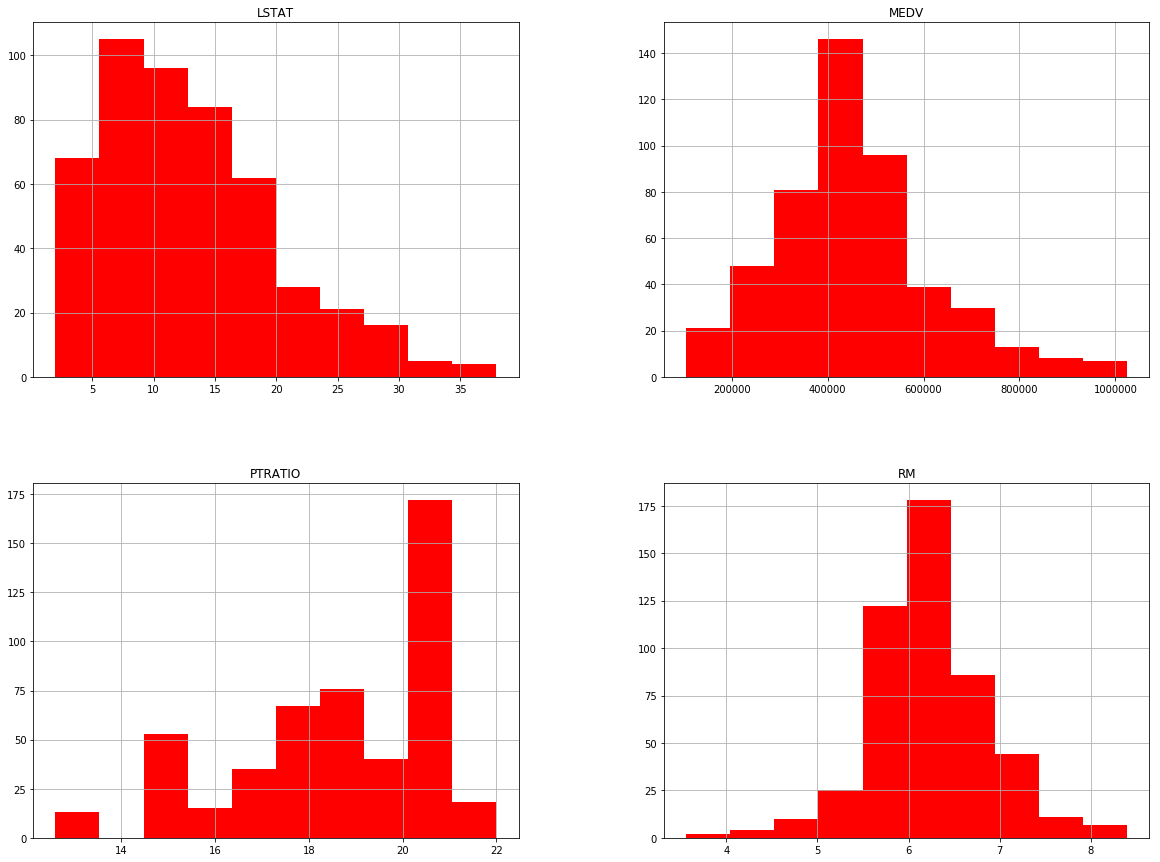

In [27]:
housing.hist(figsize=(20,15), color = 'red')
plt.show()

In [28]:
housing.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [30]:
cat_var =housing.dtypes.loc[housing.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    housing[var] = le.fit_transform(housing[var])

In [31]:
housing.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [32]:
X = housing.drop(['MEDV'], axis=1)
y = housing['MEDV']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, 
                                                     random_state = 45)

In [34]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
prediction = lin.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, prediction)))
print(rmse)

91711.95185405824


In [36]:
dtree_reg = DecisionTreeRegressor(max_depth=9)
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
dt_prediction = dtree_reg.predict(X_test)
print("Root Mean Squared error = " + str(np.sqrt(mean_squared_error(y_test, dt_prediction))))
dt_accuracy = dtree_reg.score(X_test,y_test)
print("Accuracy = " + str(dt_accuracy*100))
print("R2 score = " + str(r2_score(y_test,dt_prediction)))

Root Mean Squared error = 89594.63861229677
Accuracy = 72.5778687829926
R2 score = 0.7257786878299259


In [38]:
rf = RandomForestRegressor(30)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
rf_prediction = rf.predict(X_test)
print("Root Mean Squared Error = " + str(np.sqrt(mean_squared_error(y_test,rf_prediction))))
rf_accuracy = rf.score(X_test,y_test)
print("Accuracy = " + str(rf_accuracy*100))
print("R2 score = " + str(r2_score(y_test,rf_prediction)))

Root Mean Squared Error = 70734.6273051608
Accuracy = 82.90766879298413
R2 score = 0.8290766879298412
